# Лабораторная работа №1

## по курсу "Системы аналитических вычислений"

### студент: Инютин М. А.

## Задание 1 - Часть 1 - Квадратик

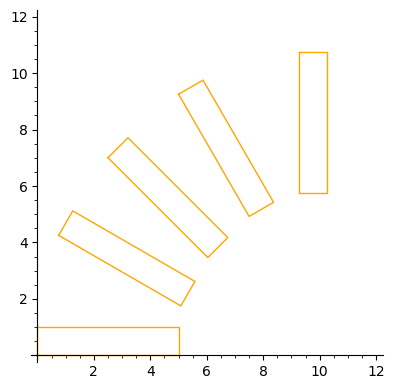

In [1]:
# Сдвиг координат
def shift_matrix(matr, dx, dy):
    return matr + matrix([ [dx, dy] for i in range(matr.nrows()) ])

# Поворот коориднат
def rotation_matrix(angle):
    phi = math.radians(angle)
    return matrix([
        [cos(phi), -sin(phi)],
        [sin(phi), cos(phi)]
    ])

# Высота и ширина прямоугольника
height = 1
width = 5

rectangle = matrix([
    [0, 0],
    [0, height],
    [width, height],
    [width, 0],
    [0, 0]
])

rotated_rectangles = []

angles = [0, 30, 45, 60, 90]

shifts = [
    [0, 0],
    [0.75, 4.25],
    [2.5, 7],
    [5, 9.25],
    [9.25, 10.75]
]

for i in range(len(angles)):
    rotated_rectangles.append(shift_matrix(rectangle * rotation_matrix(angles[i]), shifts[i][0], shifts[i][1]))

lines = line(rotated_rectangles[0], color = 'orange')
for i in range(1, len(rotated_rectangles)):
    lines = lines + line(rotated_rectangles[i], color = 'orange')

# Рисуем что-то похожее на логотип Stack Overflow
show(lines, xmin = 0.0, xmax = 12.0, ymin = 0.0, ymax = 12.0, aspect_ratio = 1)

## Задание 1 - Часть 2 - Исследование функции

## Вариант 1

### Область определения функции.

In [2]:
y(x) = (x**2 - 4)*sin((pi*(x**2))/6) / (x**2 - 1)
show(LatexExpr("y = "), y(x))

y =  (x^2 - 4)*sin(1/6*pi*x^2)/(x^2 - 1)

In [3]:
# Список точек, где функция не существует
roots_null = []

g = x ** 2 - 1
solutions = solve(g == 0, x)

for i in range(len(solutions)):
    roots_null.append(float(solutions[i].rhs()))
    show(LatexExpr("x_{" + str(i) + "} = " + str(roots_null[-1])))

x_{0} = -1.0

x_{1} = 1.0

### Является ли функция четной или нечетной, является ли периодической.

In [4]:
# Чётность функции
g = y(x) - y(-x)
simplify(g)
show(LatexExpr("y(x) - y(-x) = " + str(g)))

y(x) - y(-x) = 0

$y(x) = y(-x)$, поэтому функция $y(x)$ является чётной функцией

In [5]:
# Периодичность функции
var("T")
g = y(x) - y(T + x)
g.simplify_full()
solve(g, T)

[T == -((x^3 - x)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2) - (x^3 - 4*x)*sin(1/6*pi*x^2) + sqrt(4*(x^4 - 2*x^2 + 1)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2)^2 - 5*(x^4 - 5*x^2 + 4)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2)*sin(1/6*pi*x^2) + (x^4 - 8*x^2 + 16)*sin(1/6*pi*x^2)^2))/((x^2 - 1)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2) - (x^2 - 4)*sin(1/6*pi*x^2)), T == -((x^3 - x)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2) - (x^3 - 4*x)*sin(1/6*pi*x^2) - sqrt(4*(x^4 - 2*x^2 + 1)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2)^2 - 5*(x^4 - 5*x^2 + 4)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2)*sin(1/6*pi*x^2) + (x^4 - 8*x^2 + 16)*sin(1/6*pi*x^2)^2))/((x^2 - 1)*sin(1/6*pi*T^2 + 1/3*pi*T*x + 1/6*pi*x^2) - (x^2 - 4)*sin(1/6*pi*x^2))]

Получаем очень страшное трансцендентное выражение. Функция не является периодичной

### Точки пересечения графика с осями координат.

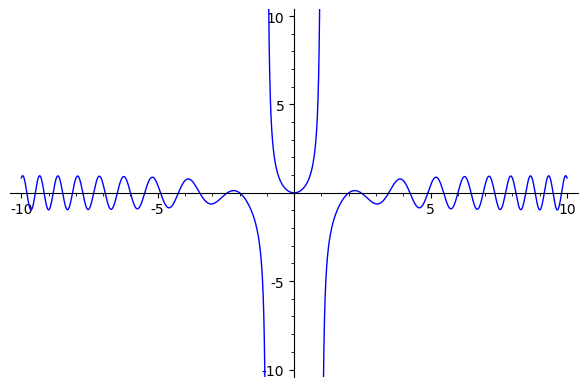

In [6]:
plot(y, xmin = -10.0, xmax = 10.0, ymin = -10.0, ymax = 10.0, exclude = [-1, 1])

Пересечение с осью Ox.

In [7]:
# Аналитические корни
roots = []

solutions = solve(y, x)
for i in range(len(solutions)):
    roots.append(float(solutions[i].rhs()))
    show(LatexExpr("x_{" + str(i) + "} = " + str(roots[-1])))

x_{0} = 0.0

x_{1} = -2.0

x_{2} = 2.0

In [8]:
# Численные корни
x3 = find_root(y, 2.1, 3)
show(LatexExpr("x_3 = " + str(x3)))
roots.append(x3)

x4 = find_root(y, 3, 4)
show(LatexExpr("x_4 = " + str(x4)))
roots.append(x4)

x_3 = 2.4494897427831783

x_4 = 3.464101615137632

Пересечение с осью Oy.

In [9]:
show(LatexExpr("y_0 = " + str(y(0))))

y_0 = 0

### Промежутки знакопостоянства.

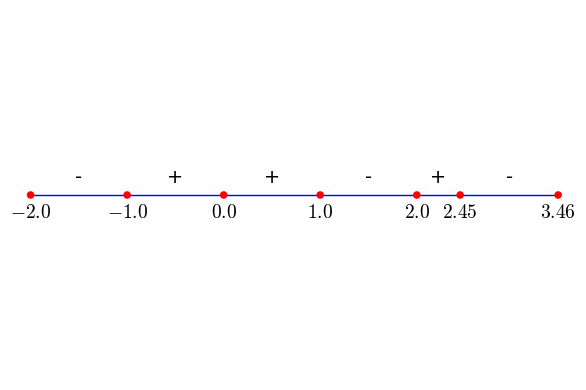

In [10]:
roots = roots + roots_null
roots = sorted(roots)

intervals_of_constancy = plot(0, xmin=roots[0], xmax=roots[-1], ymin=-0.5, ymax=0.5)

y_margin = 0.05

# Добавление точек
for i in roots:
    intervals_of_constancy += point((i, 0), color="red", size=30, zorder=10)
    intervals_of_constancy += text("$" + str(round(i, 2)) + "$", (i, -y_margin), color="black", fontsize=14)

# Добавление знаков
for i in range(len(roots) - 1):
    x_cur = float(roots[i] + roots[i + 1]) / 2
    display_sign = "-"
    if (y(x_cur).n(digits = 10) > 0):
        display_sign = "+"
    intervals_of_constancy += text(display_sign, (x_cur , y_margin), color="black", fontsize=14)

intervals_of_constancy.show(axes=False)

### Промежутки возрастания и убывания.

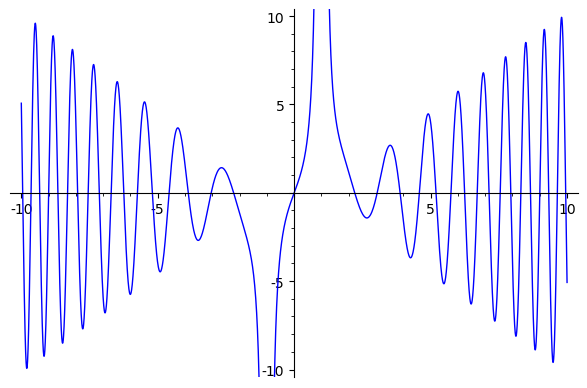

In [11]:
y_d = derivative(y(x))
plot(y_d, xmin = -10.0, xmax = 10.0, ymin = -10.0, ymax = 10.0, exclude = [-1, 1])

In [12]:
# Список точек предположительного экстремума
roots_extreme = []

# Численные корни
x_extreme = find_root(y_d, -3.5, -3)
show(LatexExpr("x_0 = " + str(x_extreme)))
roots_extreme.append(x_extreme)

x_extreme = find_root(y_d, -3, -2)
show(LatexExpr("x_1 = " + str(x_extreme)))
roots_extreme.append(x_extreme)

x_extreme = find_root(y_d, -0.5, 0.5)
show(LatexExpr("x_2 = " + str(x_extreme)))
roots_extreme.append(x_extreme)

x_extreme = find_root(y_d, 2, 3)
show(LatexExpr("x_3 = " + str(x_extreme)))
roots_extreme.append(x_extreme)

x_extreme = find_root(y_d, 3, 3.5)
show(LatexExpr("x_4 = " + str(x_extreme)))
roots_extreme.append(x_extreme)

x_0 = -3.041562328266405

x_1 = -2.2188472151361713

x_2 = 0.0

x_3 = 2.2188472151361713

x_4 = 3.041562328266405

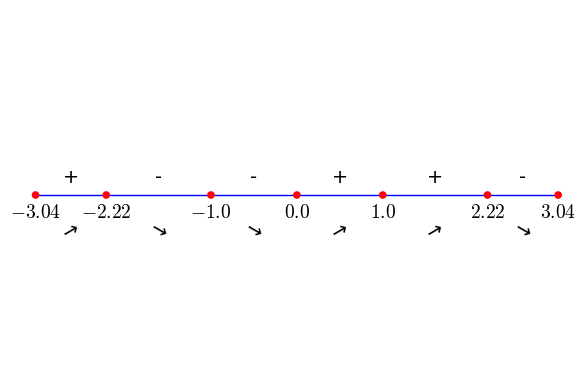

In [13]:
# В этих точках производная не определена
roots_extreme = roots_extreme + roots_null

roots_extreme = sorted(roots_extreme)

intervals_of_growth = plot(0, xmin=roots_extreme[0], xmax=roots_extreme[-1], ymin=-0.5, ymax=0.5)

y_margin = 0.05

# Добавление точек
for i in roots_extreme:
    intervals_of_growth += point((i, 0), color="red", size=30, zorder=10)
    intervals_of_growth += text("$" + str(round(i, 2)) + "$", (i, -y_margin), color="black", fontsize=14)

# Добавление знаков
for i in range(len(roots_extreme) - 1):
    x_cur = float(roots_extreme[i] + roots_extreme[i + 1]) / 2
    display_sign = "-"
    display_rotation = -30
    if (y_d(x_cur).n(digits = 10) > 0):
        display_sign = "+"
        display_rotation = 30
    intervals_of_growth += text(display_sign, (x_cur , y_margin), color="black", fontsize=14)
    intervals_of_growth += text("→", (x_cur , -2 * y_margin), rotation = display_rotation, color="black", fontsize=14)

intervals_of_growth.show(axes=False)


### Точки экстремума и значения в этих точках.

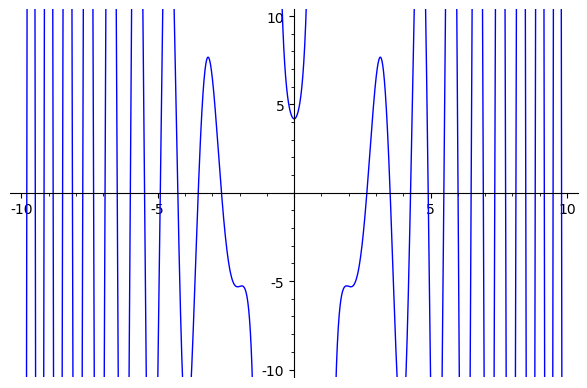

In [14]:
y_dd = derivative(y_d)
simplify(y_dd)
plot(y_dd, xmin = -10.0, xmax = 10.0, ymin = -10.0, ymax = 10.0, exclude = [-1, 1])

In [15]:
i = 0
for root in roots_extreme:
    # Вторая производная не существует в этих точках
    if (root == -1 or root == 1):
        continue
    if (y_dd(root) > 0):
        show(LatexExpr("x_" + str(i) + " = " + str(root) + ", y(x_" + str(i) + ") = " + str(y(root).n(digits = 5))), " локальный минимум")
        i = i + 1
    if (y_dd(root) < 0):
        show(LatexExpr("x_" + str(i) + " = " + str(root) + ", y(x_" + str(i) + ") = " + str(y(root).n(digits = 5))), " локальный максимум")
        i = i + 1

x_0 = -3.041562328266405, y(x_0) = -0.63092 ' локальный минимум'

x_1 = -2.2188472151361713, y(x_1) = 0.12576 ' локальный максимум'

x_2 = 0.0, y(x_2) = 0.00000 ' локальный минимум'

x_3 = 2.2188472151361713, y(x_3) = 0.12576 ' локальный максимум'

x_4 = 3.041562328266405, y(x_4) = -0.63092 ' локальный минимум'

### Непрерывность. Наличие точек разрыва и их классификация.

In [16]:
i = 0
for root in roots_null:
    lim_left = lim(y, x = root, dir = 'left')
    lim_right = lim(y, x = root, dir = 'right')
    if (lim_left == lim_right and abs(lim_left) != oo and abs(lim_right) != oo):
        show(LatexExpr("x_" + str(i) + " = " + str(root)), " разрыв первого рода")
    else:
        show(LatexExpr("x_" + str(i) + " = " + str(root)), " разрыв второго рода")
    i = i + 1

x_0 = -1.0 ' разрыв второго рода'

x_1 = 1.0 ' разрыв второго рода'

### Асимптоты.

In [17]:
lim_inf_right = lim(y, x = +oo)
show(LatexExpr(r'\lim_{x \to +\infty} y(x) = ') + str(lim_inf_right.simplify_full()))

\lim_{x \to +\infty} y(x) = ind

In [18]:
lim_inf_left = lim(y, x = -oo)
show(LatexExpr(r'\lim_{x \to -\infty} y(x) = ') + str(lim_inf_left.simplify_full()))

\lim_{x \to -\infty} y(x) = ind

Имеем асимптоты только в точках разрыва.

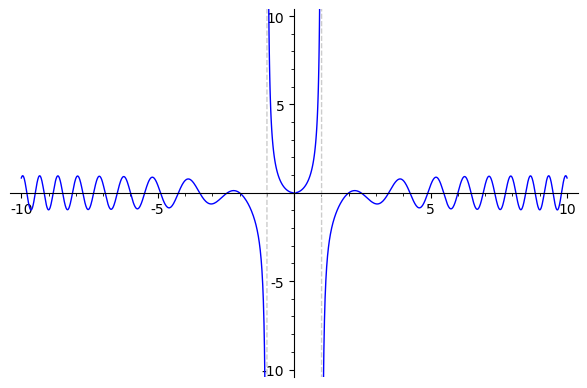

In [19]:
plot(y, xmin = -10.0, xmax = 10.0, ymin = -10.0, ymax = 10.0, detect_poles = "show")